In [27]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from bs4 import BeautifulSoup

def foot_stat_scraper(file_name):

    with open(file_name) as page:
        soup = BeautifulSoup(page, "html.parser")
        soup = soup.find('tbody')
    
    pl_num = soup.find_all('div', {'class': 'rn_nummer'})
    pl_num_list = []
    for i in pl_num:
        pl_num_list.append(i.text)

    pl_name = soup.find_all('td', {'class': 'hide'})
    pl_name_list = []
    for i in pl_name:
        pl_name_list.append(i.text)

    pl_birth = soup.find_all('td', {'class': 'zentriert'})
    pl_birth_list = []
    for i in pl_birth:
        pl_birth_list.append(i.text)

    for i in pl_birth_list:
        if len(i) < 10:
            pl_birth_list.remove(i)
    for i in pl_birth_list:
        if len(i) < 10:
            pl_birth_list.remove(i)

    pl_price = soup.find_all('td', {'class': 'rechts'})
    pl_price_list = []
    for i in pl_price:
        pl_price_list.append(i.text)

    age_list = []
    for key, val in enumerate(pl_birth_list):
        age_list.append(val[-3:-1])
        pl_birth_list[key] = val[0:-5]

    pl_name_series = Series(pl_name_list)
    pl_num_series = Series(pl_num_list)
    #pl_birth_series = Series(pl_birth_list) 
    pl_price_series = Series(pl_price_list) 
    pl_age_series = Series(age_list)
    #pl_birth_series = pd.to_datetime(pd.Series(pl_birth_series))
    
    for key, price in enumerate(pl_price_series):
        price = price.replace('m', '0000')
        price = price.replace('.', '')
        price = price.replace('k', '000')
        price = price.replace('€', '')
        pl_price_series[key] = price

    team_info = pd.concat([pl_name_series, pl_num_series, pl_age_series, pl_price_series], axis=1) #pl_birth_series,
    team_info.columns = ['Name', 'Number', 'Age', 'Price'] #'Birth Date',#
    #team_info['Birth Date'] = pd.to_datetime(team_info['Birth Date'])
    team_info['Age'] = team_info['Age'].astype('int32')
    team_info['Price'] = team_info['Price'].astype('int32')/1000000
    
    return team_info

#teams_list = ['Juve.html', 'inter.html', 'atalanta.html', 'brescia.html', 'cagliari.html', 'fiora.html', 'genoa.html', 'lazio.html', 'lecce.html', 'milan.html', 'napoli.html', 'parma.html']
teams_list = [ 'Juve.html', 'inter.html', 'lazio.html','atalanta.html', ]
seria_a_df = pd.DataFrame()
for team in teams_list:
    df = pd.DataFrame(foot_stat_scraper(str(team)))
    df['Team'] = team[0:-5]

    seria_a_df = seria_a_df.append(df, ignore_index=True)

#
print (seria_a_df)

                  Name Number  Age  Price      Team
0    Wojciech Szczesny      1   29   40.0      Juve
1     Gianluigi Buffon     77   42    1.0      Juve
2      Carlo Pinsoglio     31   29    0.5      Juve
3     Matthijs de Ligt      4   20   75.0      Juve
4        Merih Demiral     28   22   30.0      Juve
..                 ...    ...  ...    ...       ...
94  Ruslan Malinovskyi     18   26   14.0  atalanta
95        Josip Ilicic     72   32   22.0  atalanta
96          Papu Gómez     10   32   16.0  atalanta
97        Duván Zapata     91   28   45.0  atalanta
98         Luis Muriel      9   28   19.0  atalanta

[99 rows x 5 columns]


In [16]:
seria_a_df['Price'].sum()

1772.5

In [47]:
print('Juve: ', seria_a_df.where(seria_a_df['Team']=='Juve')['Price'].sum())
print('Inter: ' , seria_a_df.where(seria_a_df['Team']=='inter')['Price'].sum())
print('Lazio: ', seria_a_df.where(seria_a_df['Team']=='lazio')['Price'].sum())
print('Atalanta: ',seria_a_df.where(seria_a_df['Team']=='atalanta')['Price'].sum())

Juve:  755.5
Inter:  685.4
Lazio:  372.65
Atalanta:  331.6


In [45]:
print(seria_a_df.where(seria_a_df['Team']=='Juve')['Price'].mean())
print(seria_a_df.where(seria_a_df['Team']=='inter')['Price'].mean())
print(seria_a_df.where(seria_a_df['Team']=='lazio')['Price'].mean())
print(seria_a_df.where(seria_a_df['Team']=='atalanta')['Price'].mean())

32.84782608695652
26.361538461538462
13.30892857142857
15.072727272727274


In [21]:
seria_a_df.where(seria_a_df['Team']=='Juve')['Age'].sum()

665.0

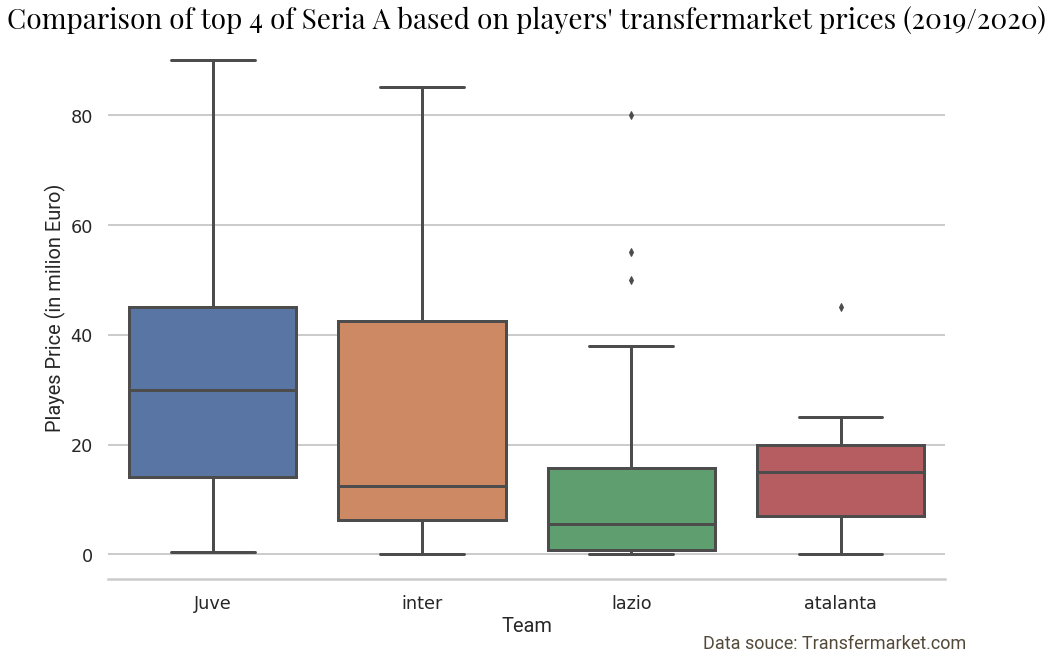

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='PlayfairDisplay-Regular.ttf', size=28)

subtitle_font = fm.FontProperties(fname='Roboto-Regular.ttf', size=18)

lable_font = fm.FontProperties(fname='Roboto-Regular.ttf', size=20)

# Color Themes
color_bg = '#FEF1E5'
darker_highlight = '#FBEADC'
lighter_highlight = '#ffffff'

plt.figure(figsize=(15,10))

fontdict={'fontsize': 24,
          'weight' : 'bold',
         'horizontalalignment': 'center'}

sns.set_context("poster", font_scale=0.8)


ax = sns.boxplot(y="Price", x='Team', data = seria_a_df)
#ax = sns.scatterplot(x="Avg_temp", y="F_rate", hue="Class", data=temp_fert_2013)


ax.set_title('Comparison of top 4 of Seria A based on players\' transfermarket prices (2019/2020)', fontproperties=heading_font, color="black",
         position=(0.5, 1));

plt.text(x=3.6, y=-17, s='Data souce: Transfermarket.com',fontproperties=subtitle_font, horizontalalignment='right',color='#524939')

plt.xlabel('Team', fontproperties=lable_font)
plt.ylabel('Playes Price (in milion Euro)', fontproperties=lable_font)
sns.despine(left=True)


#plt.savefig('wieght_box.png')

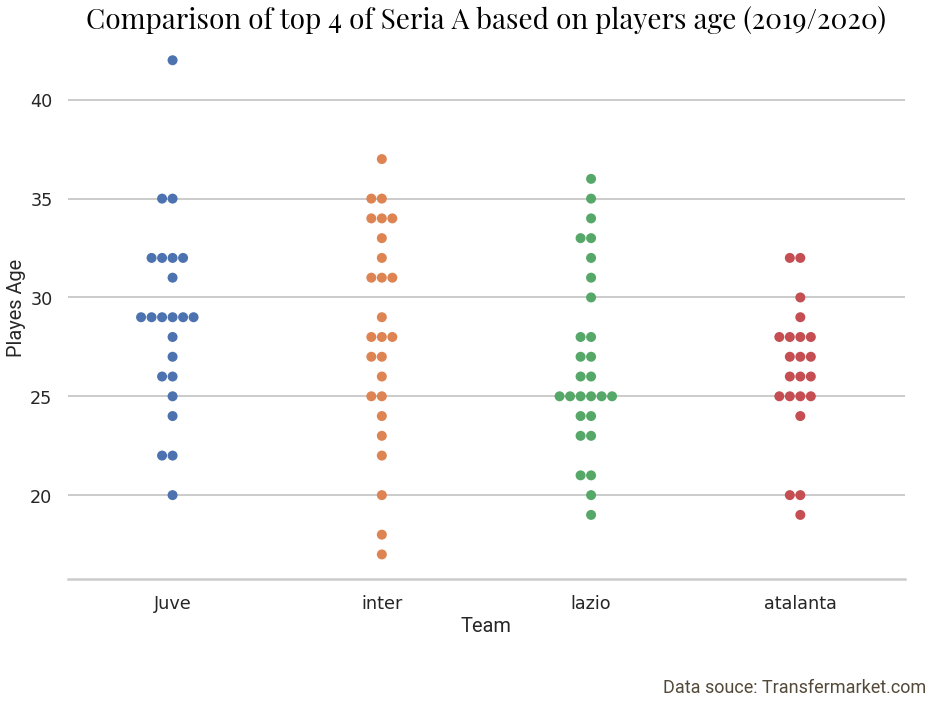

In [51]:
plt.figure(figsize=(15,10))

fontdict={'fontsize': 24,
          'weight' : 'bold',
         'horizontalalignment': 'center'}

sns.set_context("poster", font_scale=0.8)


ax = sns.swarmplot(y="Age", x='Team', data = seria_a_df, size=10)
#ax = sns.scatterplot(x="Avg_temp", y="F_rate", hue="Class", data=temp_fert_2013)


ax.set_title('Comparison of top 4 of Seria A based on players age (2019/2020)', fontproperties=heading_font, color="black",
         position=(0.5, 1));

plt.text(x=3.6, y=10, s='Data souce: Transfermarket.com',fontproperties=subtitle_font, horizontalalignment='right',color='#524939')

plt.xlabel('Team', fontproperties=lable_font)
plt.ylabel('Playes Age', fontproperties=lable_font)
sns.despine(left=True)

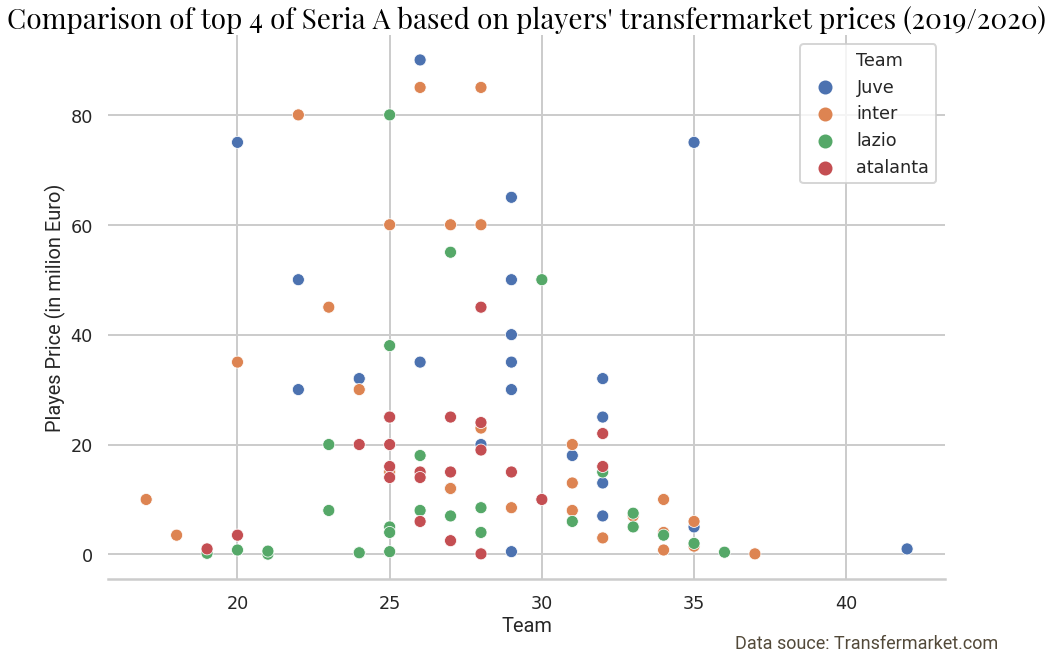

In [39]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(y="Price", x='Age',hue='Team', data = seria_a_df)
#ax = sns.scatterplot(x="Avg_temp", y="F_rate", hue="Class", data=temp_fert_2013)


ax.set_title('Comparison of top 4 of Seria A based on players\' transfermarket prices (2019/2020)', fontproperties=heading_font, color="black",
         position=(0.5, 1));

plt.text(x=45, y=-17, s='Data souce: Transfermarket.com',fontproperties=subtitle_font, horizontalalignment='right',color='#524939')

plt.xlabel('Team', fontproperties=lable_font)
plt.ylabel('Playes Price (in milion Euro)', fontproperties=lable_font)
sns.despine(left=True)